In [5]:
# Prepare

%matplotlib notebook

import numpy as np
import pylab as plt
import seaborn as sns; sns.set()
import pandas as pd
import pickle
import scipy
import matplotlib
from scipy import sparse
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from openTSNE import TSNE
#from openTSNE.sklearn import TSNE
# import tsne
#import sys; sys.path.append('/home/localadmin/github/FIt-SNE')
#from fast_tsne import fast_tsne

In [15]:
colors18 = ['#ED1D0C','#808000', '#FA8072', '#7DDCAC', '#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94']
roi_labels = np.load('/Users/jenniferthem/Masterthesis_Data/roi_labels.npy', allow_pickle=True)
roi_labels_df = pd.DataFrame(roi_labels)


In [6]:
# FC Data
X = np.load('/Users/jenniferthem/Masterthesis_Data/corr_dist_df_baseline.npy')
#ket_mat = np.load('/Users/jenniferthem/Masterthesis_Data/Ketamine_corr_dist.npy')
#placebo_mat = np.load('/Users/jenniferthem/Masterthesis_Data/Placebo_corr_dist.npy')

In [10]:
tsne = TSNE(
    n_components=2, perplexity=30, learning_rate=200,
    n_jobs=4, initialization="pca", metric="cosine",
    early_exaggeration_iter=250, early_exaggeration=12, n_iter=750,
    neighbors="exact", negative_gradient_method="bh",
)

embedding = tsne.fit(X)

In [12]:
embedding.shape

(11883, 2)

<IPython.core.display.Javascript object>


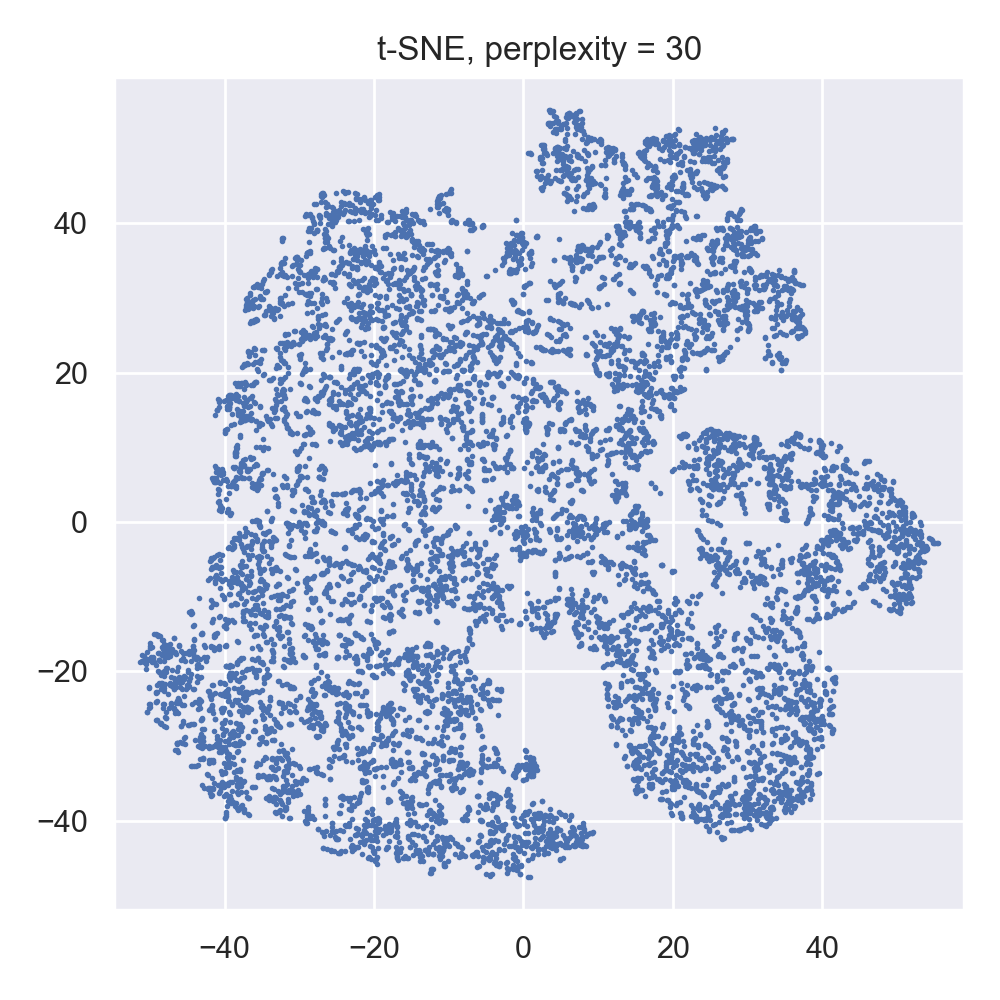

In [17]:
plt.figure(figsize=(5,5))
plt.gca().set_aspect('equal', adjustable='datalim')
plt.scatter(embedding[:,0], embedding[:,1], s=1)
plt.title('t-SNE, perplexity = 30')
plt.tight_layout()

In [ ]:
# This uses perplexity=30 (default) and random initialisation
# The result will depend on the random seed (here, 42)

%time 
tsne_default = TSNE(X, seed=42)  

plt.figure(figsize=(5,5))
plt.gca().set_aspect('equal', adjustable='datalim')
plt.scatter(tsne_default[:,0], tsne_default[:,1], s=1, 
            color=tasic2018['clusterColors'][tasic2018['clusters']])
plt.title('t-SNE, perplexity = 30')
plt.tight_layout()

### recommended t-SNE settings

In [ ]:
%%time

pcaInit = X[:,:2] / np.std(X[:,0]) * 0.0001
tsne_ours = fast_tsne(X, initialization = pcaInit,
                      learning_rate = X.shape[0]/12,
                      perplexity_list = [30, int(X.shape[0]/100)])

plt.figure(figsize=(5,5))
plt.gca().set_aspect('equal', adjustable='datalim')
plt.scatter(tsne_ours[:,0], tsne_ours[:,1], s=1,
            color=tasic2018['clusterColors'][tasic2018['clusters']])
plt.title('A better t-SNE')
plt.tight_layout()